In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('../Data/selected_data/merged_data.csv')

C:\Users\kauad\AppData\Local\Temp\ipykernel_12672\4150934281.py:6: DtypeWarning: Columns (30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../Data/selected_data/merged_data.csv')


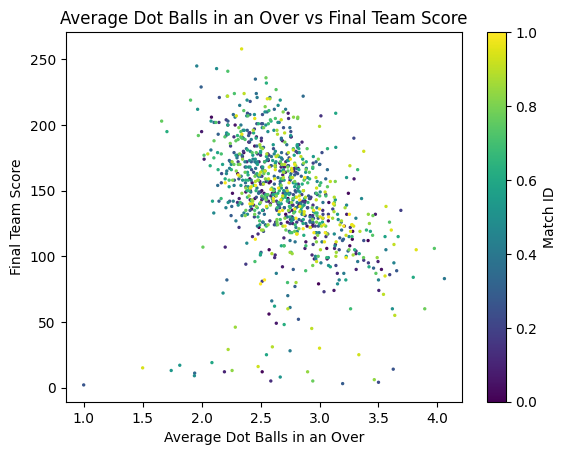

In [2]:
# Calculate the average number of dot balls in an over of a match
dot_balls = data[data['runs_by_bat'] == 0]
dot_balls = dot_balls.groupby(['match_id', 'innings', 'over']).size().reset_index(name='dot_balls')
dot_balls = dot_balls.groupby(['match_id', 'innings']).mean().reset_index()
dot_balls = dot_balls.groupby('match_id').mean().reset_index()
dot_balls = dot_balls.rename(columns={'dot_balls': 'avg_dot_balls'})

# Calculate the final team score
final_team_score = data.groupby('match_id').last().reset_index()
final_team_score = final_team_score[['match_id', 'final_team_total']]
final_team_score = final_team_score.rename(columns={'final_team_total': 'team_score'})

num_matches = len(dot_balls['match_id'].unique())
colors = plt.cm.viridis(np.linspace(0, 1, num_matches))

# Plot average dot balls in an over of a match vs final score
plt.scatter(dot_balls['avg_dot_balls'], final_team_score['team_score'], c=dot_balls['match_id'].map(dict(zip(dot_balls['match_id'].unique(), colors))), s=2)
plt.xlabel('Average Dot Balls in an Over')
plt.ylabel('Final Team Score')
plt.title('Average Dot Balls in an Over vs Final Team Score')
plt.colorbar(label='Match ID')
plt.show()

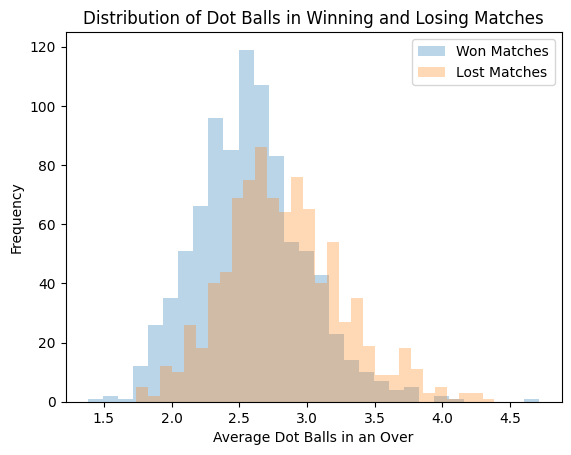

In [3]:
# Separate the dataset into winning and losing matches
won_matches = data[data['won'] == 1]
lost_matches = data[data['won'] == 0]

# For winning matches, calculate the average number of dot balls per over
won_dot_balls = won_matches[won_matches['runs_by_bat'] == 0]
won_dot_balls = won_dot_balls.groupby(['match_id', 'innings', 'over']).size().reset_index(name='dot_balls')
won_dot_balls = won_dot_balls.groupby(['match_id', 'innings']).mean().reset_index()
won_dot_balls = won_dot_balls.groupby('match_id').mean().reset_index()
won_dot_balls = won_dot_balls.rename(columns={'dot_balls': 'avg_dot_balls'})

# For losing matches, calculate the average number of dot balls per over
lost_dot_balls = lost_matches[lost_matches['runs_by_bat'] == 0]
lost_dot_balls = lost_dot_balls.groupby(['match_id', 'innings', 'over']).size().reset_index(name='dot_balls')
lost_dot_balls = lost_dot_balls.groupby(['match_id', 'innings']).mean().reset_index()
lost_dot_balls = lost_dot_balls.groupby('match_id').mean().reset_index()
lost_dot_balls = lost_dot_balls.rename(columns={'dot_balls': 'avg_dot_balls'})

# Plot histograms for the distribution of dot balls in winning and losing matches
plt.hist(won_dot_balls['avg_dot_balls'], bins=30, alpha=0.3, label='Won Matches')
plt.hist(lost_dot_balls['avg_dot_balls'], bins=30, alpha=0.3, label='Lost Matches')
plt.xlabel('Average Dot Balls in an Over')
plt.ylabel('Frequency')
plt.title('Distribution of Dot Balls in Winning and Losing Matches')
plt.legend()
plt.show()

In [27]:
dot_balls = data[data['runs_by_bat'] == 0]
dot_balls_count = dot_balls.groupby(['match_id', 'over']).size().reset_index(name='dot_balls')

cumulative_dot_balls = pd.DataFrame()
# Iterate over each match
for match_id in dot_balls_count['match_id'].unique():
    match_dot_balls = dot_balls_count[dot_balls_count['match_id'] == match_id]
    match_dot_balls = match_dot_balls.sort_values(by='over', ascending=False) 
    match_dot_balls['cumulative_dot_balls'] = match_dot_balls['dot_balls'].cumsum()
    cumulative_dot_balls = pd.concat([cumulative_dot_balls, match_dot_balls])

In [28]:
average_cumulative_dot_balls = cumulative_dot_balls.groupby('over')['cumulative_dot_balls'].mean().reset_index()
average_cumulative_dot_balls = average_cumulative_dot_balls.sort_values(by='over')
print(average_cumulative_dot_balls)

    over  cumulative_dot_balls
0      0             93.552604
1      1             86.215122
2      2             79.499466
3      3             73.434829
4      4             67.570053
5      5             62.069668
6      6             56.464440
7      7             51.859763
8      8             47.659412
9      9             43.327113
10    10             39.297149
11    11             35.124031
12    12             30.990011
13    13             26.853933
14    14             22.668911
15    15             18.458239
16    16             14.579909
17    17             10.746528
18    18              7.004662
19    19              3.419434


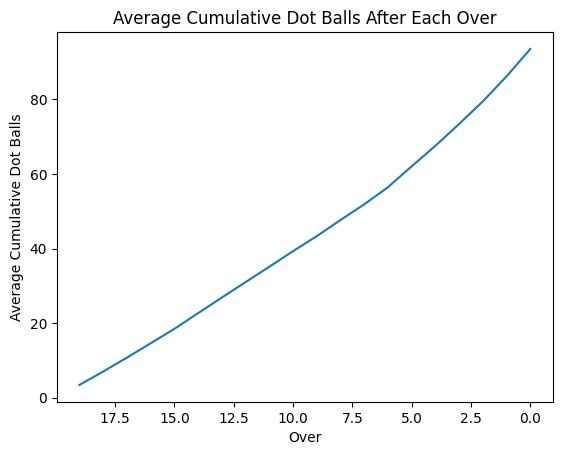

In [29]:
plt.plot(average_cumulative_dot_balls['over'], average_cumulative_dot_balls['cumulative_dot_balls'])
plt.xlabel('Over')
plt.ylabel('Average Cumulative Dot Balls')
plt.title('Average Cumulative Dot Balls After Each Over')
plt.gca().invert_xaxis()
plt.show()

In [30]:
won_matches = data[data['won'] == 1]
lost_matches = data[data['won'] == 0]

In [31]:
dot_balls_won = won_matches[won_matches['runs_by_bat'] == 0]
dot_balls_count_won = dot_balls_won.groupby(['match_id', 'over']).size().reset_index(name='dot_balls')

cumulative_dot_balls_won = pd.DataFrame()
for match_id in dot_balls_count_won['match_id'].unique():
    match_dot_balls = dot_balls_count_won[dot_balls_count_won['match_id'] == match_id]
    match_dot_balls = match_dot_balls.sort_values(by='over', ascending=False)
    match_dot_balls['cumulative_dot_balls'] = match_dot_balls['dot_balls'].cumsum()
    cumulative_dot_balls_won = pd.concat([cumulative_dot_balls_won, match_dot_balls])

average_cumulative_dot_balls_won = cumulative_dot_balls_won.groupby('over')['cumulative_dot_balls'].mean().reset_index()
average_cumulative_dot_balls_won = average_cumulative_dot_balls_won.sort_values(by='over')

print("Average Cumulative Dot Balls After Each Over for Winning Matches")
print(average_cumulative_dot_balls_won)

Average Cumulative Dot Balls After Each Over for Winning Matches
    over  cumulative_dot_balls
0      0             43.820112
1      1             40.223356
2      2             37.012629
3      3             33.866972
4      4             31.154026
5      5             28.319026
6      6             25.931624
7      7             23.890841
8      8             21.769614
9      9             19.771613
10    10             18.035019
11    11             16.168478
12    12             14.188406
13    13             12.254446
14    14             10.508868
15    15              8.840228
16    16              7.104874
17    17              5.344668
18    18              3.734007
19    19              2.124224


In [33]:
dot_balls_lost = lost_matches[lost_matches['runs_by_bat'] == 0]
dot_balls_count_lost = dot_balls_lost.groupby(['match_id', 'over']).size().reset_index(name='dot_balls')

cumulative_dot_balls_lost = pd.DataFrame()
for match_id in dot_balls_count_lost['match_id'].unique():
    match_dot_balls = dot_balls_count_lost[dot_balls_count_lost['match_id'] == match_id]
    match_dot_balls = match_dot_balls.sort_values(by='over', ascending=False)
    match_dot_balls['cumulative_dot_balls'] = match_dot_balls['dot_balls'].cumsum()
    cumulative_dot_balls_lost = pd.concat([cumulative_dot_balls_lost, match_dot_balls])

average_cumulative_dot_balls_lost = cumulative_dot_balls_lost.groupby('over')['cumulative_dot_balls'].mean().reset_index()
average_cumulative_dot_balls_lost = average_cumulative_dot_balls_lost.sort_values(by='over')

print("Average Cumulative Dot Balls After Each Over for Losing Matches")
print(average_cumulative_dot_balls_lost)

Average Cumulative Dot Balls After Each Over for Losing Matches
    over  cumulative_dot_balls
0      0             51.427130
1      1             47.609620
2      2             44.145455
3      3             40.861991
4      4             37.853042
5      5             34.927419
6      6             32.141667
7      7             29.523585
8      8             27.328485
9      9             25.011084
10    10             22.692961
11    11             20.240831
12    12             18.050617
13    13             15.782338
14    14             13.428040
15    15             11.217617
16    16              9.108037
17    17              7.036585
18    18              4.842179
19    19              2.567732


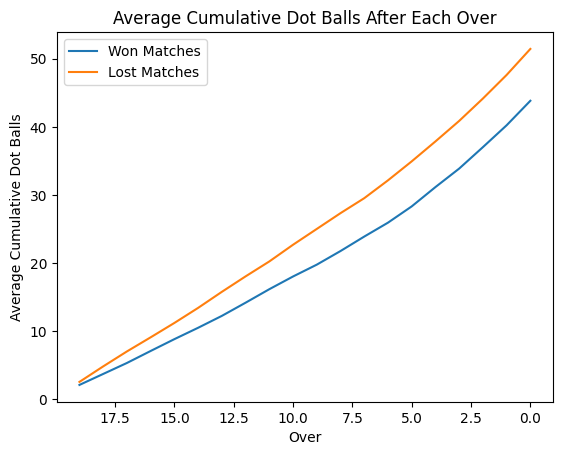

In [34]:
plt.plot(average_cumulative_dot_balls_won['over'], average_cumulative_dot_balls_won['cumulative_dot_balls'], label='Won Matches')
plt.plot(average_cumulative_dot_balls_lost['over'], average_cumulative_dot_balls_lost['cumulative_dot_balls'], label='Lost Matches')
plt.xlabel('Over')
plt.ylabel('Average Cumulative Dot Balls')
plt.title('Average Cumulative Dot Balls After Each Over')
plt.gca().invert_xaxis()
plt.legend()
plt.show()

In [39]:
first_innings_data = data[data['innings'] == 1]

team_over_dot_balls = {}

# Iterate over each team
teams = first_innings_data['batting_team'].unique()
for team in teams:
    team_data = first_innings_data[first_innings_data['batting_team'] == team]
    dot_balls = team_data[team_data['runs_by_bat'] == 0]
    dot_balls_count = dot_balls.groupby(['match_id', 'over']).size().reset_index(name='dot_balls')
    dot_balls_avg = dot_balls_count.groupby('over')['dot_balls'].mean().reset_index()
    team_over_dot_balls[team] = dot_balls_avg
    print(f"{team} Average dot balls per over:\n{dot_balls_avg.head()}")

Australia Average dot balls per over:
   over  dot_balls
0     0   3.784810
1     1   3.202532
2     2   3.000000
3     3   2.922078
4     4   2.600000
Zimbabwe Average dot balls per over:
   over  dot_balls
0     0   4.160000
1     1   3.680000
2     2   3.204082
3     3   3.000000
4     4   3.000000
India Average dot balls per over:
   over  dot_balls
0     0   3.913793
1     1   3.570175
2     2   3.087719
3     3   2.657895
4     4   2.765766
Bangladesh Average dot balls per over:
   over  dot_balls
0     0   3.750000
1     1   3.774194
2     2   3.166667
3     3   3.000000
4     4   3.016129
New Zealand Average dot balls per over:
   over  dot_balls
0     0   3.679245
1     1   3.323810
2     2   3.067961
3     3   3.104762
4     4   3.009615
South Africa Average dot balls per over:
   over  dot_balls
0     0   3.728261
1     1   3.451613
2     2   2.833333
3     3   2.967033
4     4   2.808989
England Average dot balls per over:
   over  dot_balls
0     0   3.367089
1     1   3.3

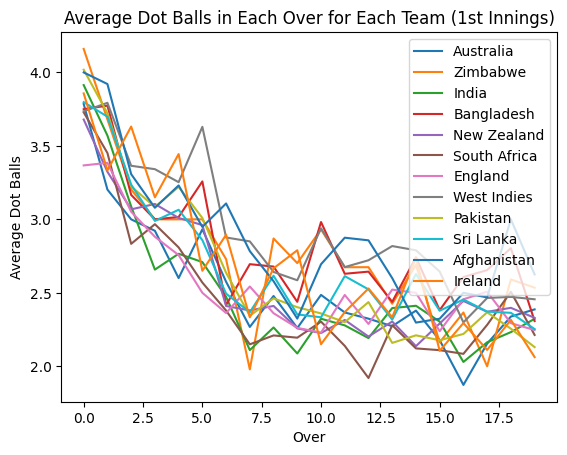

In [40]:
for team, dot_balls_avg in team_over_dot_balls.items():
    plt.plot(dot_balls_avg['over'], dot_balls_avg['dot_balls'], label=team)

plt.xlabel('Over')
plt.ylabel('Average Dot Balls')
plt.title('Average Dot Balls in Each Over for Each Team (1st Innings)')
plt.legend()
plt.show()